In [2]:
import healpy as hp
import numpy as np
from scipy import stats
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.io import fits

In [21]:
ARC2_Tb = {}

with fits.open('arc2_3150_v19.fits') as arc3150:
    NSIDE = arc3150[0].header['NSIDE']
    ARC2_Tb[3150e6] = arc3150[1].data['TEMPERATURE']
    
with fits.open('arc2_3410_v19.fits') as arc3410:
    ARC2_Tb[3410e6] = arc3410[1].data['TEMPERATURE']

    
npix = hp.nside2npix(NSIDE)
pixels = np.arange(npix)

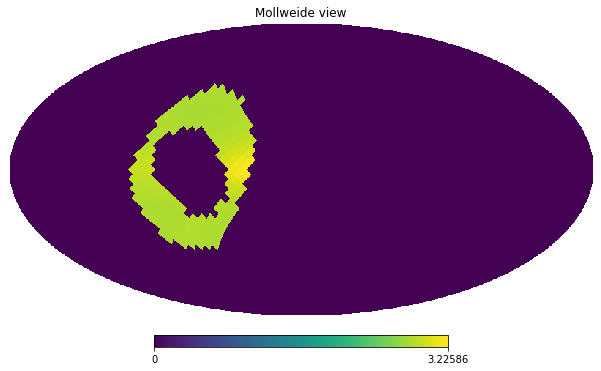

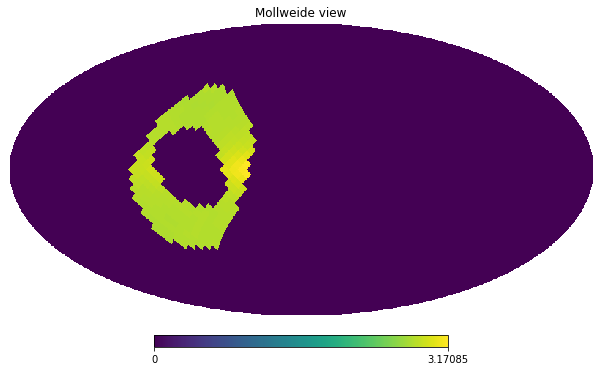

In [12]:
hp.mollview(ARC2_Tb[3150e6], nest=True)
hp.mollview(ARC2_Tb[3410e6], nest=True)

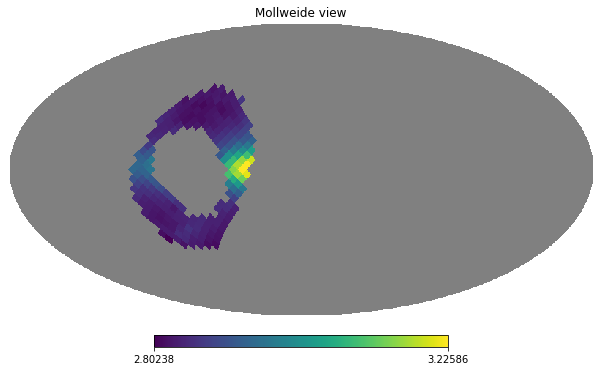

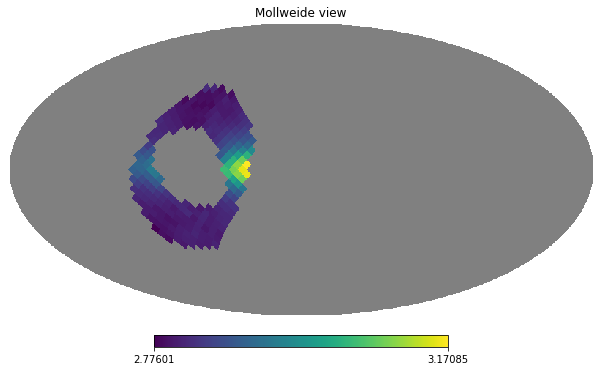

In [23]:
#find indicies of observations (regions wehre T != 0)

idx = {}
idx[3150e6] = np.where(ARC2_Tb[3150e6] != 0)
idx[3410e6] = np.where(ARC2_Tb[3410e6] != 0)

ARC2_Tobs = {}
ARC2_Tobs[3150e6] = ARC2_Tb[3150e6][idx[3150e6]]
ARC2_Tobs[3410e6] = ARC2_Tb[3410e6][idx[3410e6]]


Tb1 = np.array(ARC2_Tb[3150e6])
Tb2 = np.array(ARC2_Tb[3410e6])

Tb1[np.where(Tb1==0)] = None
Tb2[np.where(Tb2==0)] = None

hp.mollview(Tb1, nest=True)
hp.mollview(Tb2, nest=True)


In [13]:
# extragalactic brightness temps calculated in sky-brightness-model notebook

ARC2_Teg = {}
ARC2_Teg[3150e6] = 0.0103
ARC2_Teg[3410e6] = 0.0083

In [22]:
# get coordinates of obs

ARC2_l = {}
ARC2_b = {}

ARC2_l[3150e6], ARC2_b[3150e6] = hp.pix2ang(NSIDE, pixels[idx[3150e6]], nest=True, lonlat=True)
ARC2_l[3410e6], ARC2_b[3410e6] = hp.pix2ang(NSIDE, pixels[idx[3410e6]], nest=True, lonlat=True)


In [37]:
a = np.array([1,2,3,4,5])
b = np.array([3,3,3,3,3])
c = np.array([6,6,6,6,6])

l = a < b
u = b < c

print(l,u)
print(np.sum(l) + np.sum(u))
print(2*len(l))

[ True  True False False False] [ True  True  True  True  True]
7
10
